In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('./data/fire_theft.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


epoch: 0, loss function: 546.8438720703125, theta0: 0.25928568840026855, theta1: 3.737309455871582
epoch: 100, loss function: 1294.7713623046875, theta0: 3.8096203804016113, theta1: 4.906329154968262
epoch: 200, loss function: 1150.4957275390625, theta0: 6.810218811035156, theta1: -0.9201321601867676
epoch: 300, loss function: 193.2267303466797, theta0: 8.87058162689209, theta1: 1.6384315490722656
epoch: 400, loss function: 263.4861755371094, theta0: 10.965261459350586, theta1: 2.3954269886016846
epoch: 500, loss function: 223.1549530029297, theta0: 12.04031753540039, theta1: 1.0116788148880005
epoch: 600, loss function: 355.5488586425781, theta0: 13.28693962097168, theta1: 2.6697516441345215
epoch: 700, loss function: 184.07688903808594, theta0: 13.831664085388184, theta1: 1.3512401580810547
epoch: 800, loss function: 290.07562255859375, theta0: 14.739654541015625, theta1: 0.4985339641571045
epoch: 900, loss function: 1081.22900390625, theta0: 15.310667991638184, theta1: -1.2730417251

epoch: 8200, loss function: 2527.1533203125, theta0: 16.873794555664062, theta1: -2.993128538131714
epoch: 8300, loss function: 191.1768035888672, theta0: 17.242273330688477, theta1: 1.0090587139129639
epoch: 8400, loss function: 522.2755126953125, theta0: 17.668970108032227, theta1: 2.925416946411133
epoch: 8500, loss function: 187.35800170898438, theta0: 17.614336013793945, theta1: 1.0488232374191284
epoch: 8600, loss function: 208.70130920410156, theta0: 17.435956954956055, theta1: 1.7645137310028076
epoch: 8700, loss function: 182.626708984375, theta0: 17.177183151245117, theta1: 1.1719341278076172
epoch: 8800, loss function: 341.58990478515625, theta0: 17.155494689941406, theta1: 2.4356155395507812
epoch: 8900, loss function: 207.6440887451172, theta0: 17.440147399902344, theta1: 1.7553596496582031
epoch: 9000, loss function: 4439.2822265625, theta0: 17.220325469970703, theta1: -4.507686614990234
epoch: 9100, loss function: 815.6669311523438, theta0: 17.208782196044922, theta1: 3.

epoch: 16300, loss function: 183.20188903808594, theta0: 17.45283317565918, theta1: 1.1426973342895508
epoch: 16400, loss function: 1889.6806640625, theta0: 17.379343032836914, theta1: -2.3864593505859375
epoch: 16500, loss function: 206.43357849121094, theta0: 17.433809280395508, theta1: 0.837546706199646
epoch: 16600, loss function: 190.54742431640625, theta0: 16.964141845703125, theta1: 1.5984642505645752
epoch: 16700, loss function: 317.76708984375, theta0: 16.952669143676758, theta1: 0.2722179889678955
epoch: 16800, loss function: 355.2673645019531, theta0: 17.154109954833984, theta1: 2.4826650619506836
epoch: 16900, loss function: 197.2099151611328, theta0: 17.215106964111328, theta1: 0.9375923871994019
epoch: 17000, loss function: 293.8634338378906, theta0: 17.0997371673584, theta1: 0.3599510192871094
epoch: 17100, loss function: 184.5706329345703, theta0: 17.235376358032227, theta1: 1.4827346801757812
epoch: 17200, loss function: 1716.8936767578125, theta0: 16.831533432006836, 

epoch: 24300, loss function: 387.119873046875, theta0: 17.334503173828125, theta1: 0.016492366790771484
epoch: 24400, loss function: 332.2852478027344, theta0: 16.834972381591797, theta1: 0.2243976593017578
epoch: 24500, loss function: 300.302001953125, theta0: 16.8353214263916, theta1: 0.3467255234718323
epoch: 24600, loss function: 292.6449890136719, theta0: 17.10554313659668, theta1: 0.3647655248641968
epoch: 24700, loss function: 248.57528686523438, theta0: 17.054363250732422, theta1: 2.0454909801483154
epoch: 24800, loss function: 6171.6884765625, theta0: 17.073801040649414, theta1: 8.200389862060547
epoch: 24900, loss function: 48202.04296875, theta0: 16.108600616455078, theta1: -18.15087890625
epoch: 25000, loss function: 230.9125518798828, theta0: 16.194780349731445, theta1: 1.9856507778167725
epoch: 25100, loss function: 204.49085998535156, theta0: 16.151124954223633, theta1: 0.9202113151550293
epoch: 25200, loss function: 612.3038940429688, theta0: 16.650774002075195, theta1:

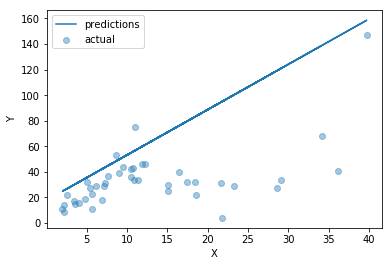

In [4]:
n_samples = df['X'].shape[0]
X = tf.placeholder(name='X', dtype='float32')
Y = tf.placeholder(name='Y', dtype='float32')

theta0 = tf.Variable(0.0, 'theta0')
theta1 = tf.Variable(0.0, 'theta1')

y_pred = theta1*X + theta0
loss_function = tf.multiply((1.0/(2.0*n_samples)), tf.reduce_sum(tf.pow((y_pred - Y), 2)))
loss_summary = tf.summary.scalar(tensor=loss_function, name='loss_summary')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss_function)

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/problem5/loss_summary')
    sess.run(tf.global_variables_initializer())
    for step in range(30000): 
        indices = np.random.choice(range(n_samples - 1), 30)
        train_instances = df.iloc[indices]
        sess.run(optimizer, {X: train_instances['X'],Y: train_instances['Y']})
        
        loss = sess.run(loss_function, {X: df['X'], Y: df['Y']})
        if(step % 100 == 0):
            print("epoch: {0}, loss function: {1}, theta0: {2}, theta1: {3}".format(step, loss, sess.run(theta0), sess.run(theta1)))
        
        summary = sess.run(loss_summary, {X: df['X'], Y: df['Y']})
        writer.add_summary(summary, step)
    
    plt.scatter(df['X'], df['Y'], alpha=0.4, label='actual')
    plt.plot(df['X'], sess.run(y_pred, {X: df['X'], Y: df['Y']}), label='predictions')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()